In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

Compare readings for each replicates

In [3]:
df = pd.read_excel('/Users/bamudamaris/ownCloud2/labs/datasets/gfp_measurement/clones_batch3_R3_22.06.24.xlsx', sheet_name = 'gfp')
df.head(5)

,Time,Blank_1,Blank_2,Blank_3,DH5a_1,DH5a_2,DH5a_3,pOT2_1,pOT2_2,pOT2_3,...,yfgJ-ctrl_3,yfgJ-test_1,yfgJ-test_2,yfgJ-test_3,yqiD-ctrl_1,yqiD-ctrl_2,yqiD-ctrl_3,yqiD-test_1,yqiD-test_2,yqiD-test_3
0,30,654,638,632,1211,1197,1153,649,634,639,...,638,642,612,645,628,647,637,648,648,643
1,60,649,635,633,1173,1162,1156,645,622,633,...,646,647,629,617,626,639,624,657,639,655
2,90,621,616,627,1170,1191,1138,636,637,622,...,643,636,636,621,632,624,626,618,640,654
3,120,619,620,607,1163,1177,1162,654,630,625,...,628,623,633,634,626,623,629,654,655,651
4,150,631,627,625,1168,1177,1140,633,629,635,...,639,625,634,615,619,636,633,661,650,655


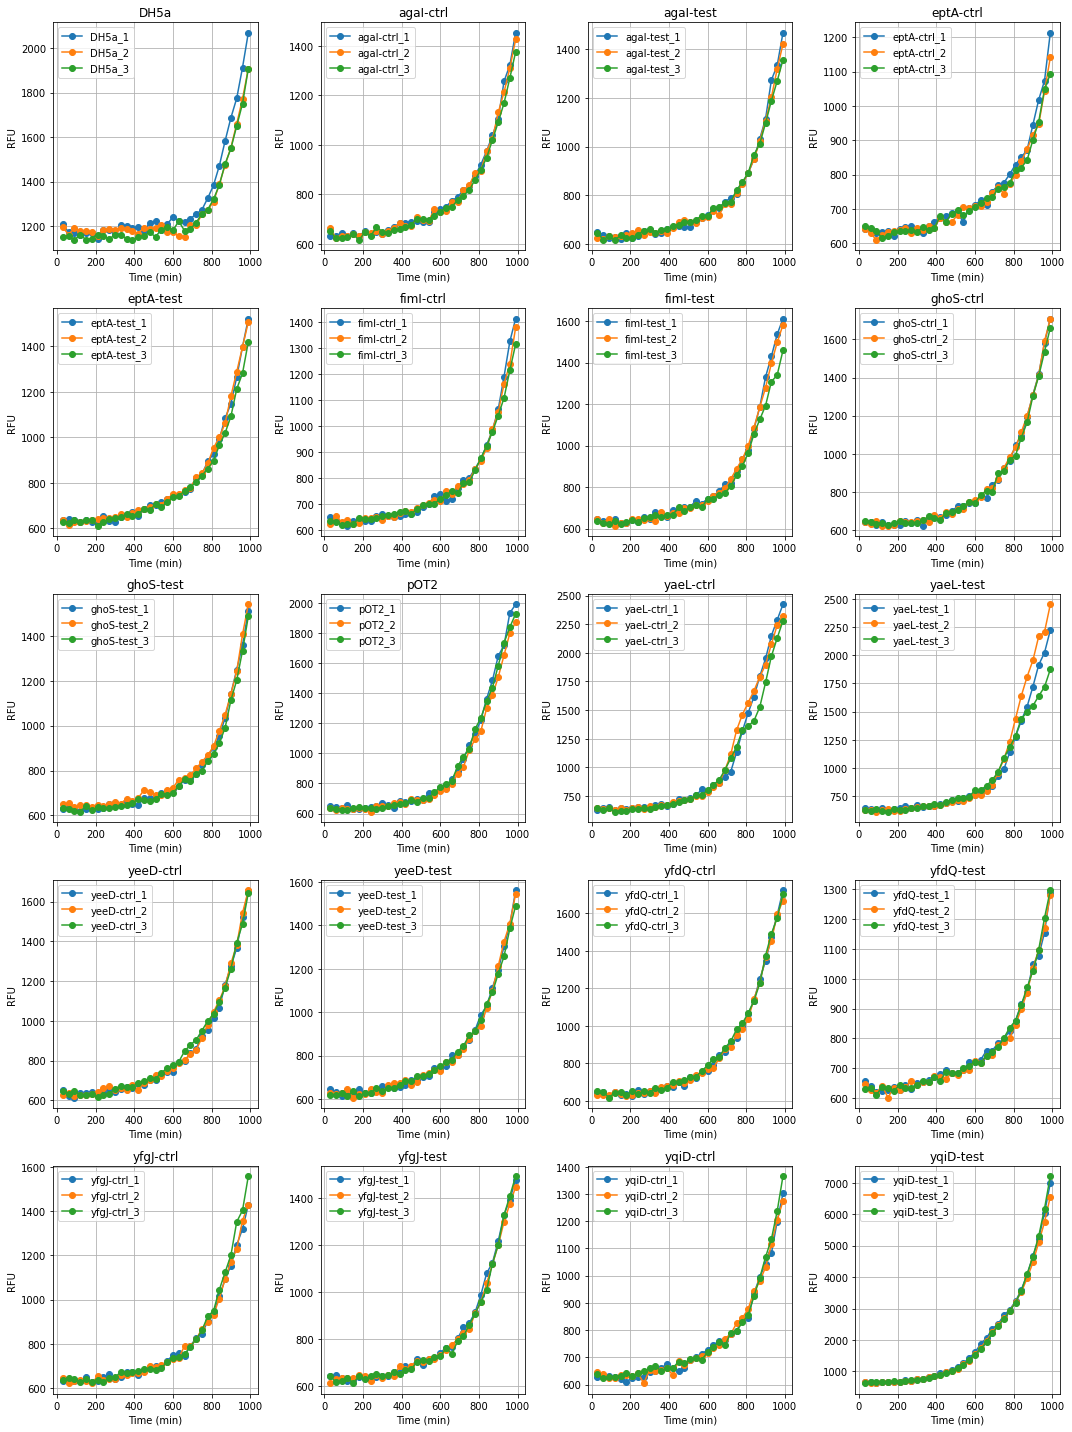

In [4]:
# Extracting unique sample names
samples = set([s.split('_')[0] for s in df.columns[1:]])  # Assuming first column is 'Time'

# Filter out blank samples
samples = [s for s in samples if not s.startswith('Blank')]

# Calculate the number of rows needed for subplots
n_samples = len(samples)
n_cols = 4
n_rows = (n_samples + n_cols - 1) // n_cols  # This ensures enough rows for all samples

# Creating subplots for each sample and its replicates
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 20))
axs = axs.flatten()  # Flatten the 2D array of axes into a 1D array

# Plotting each sample and its replicates in separate subplots
for idx, sample in enumerate(sorted(samples)):  # Sort to ensure similar names are side by side
    ax = axs[idx]  # Select the current subplot
    
    for i in range(1, 4):  # Loop through replicates _1, _2, _3
        replicate = f'{sample}_{i}'
        if replicate in df.columns:
            ax.plot(df['Time'], df[replicate], marker='o', linestyle='-', label=replicate)
    
    ax.set_xlabel('Time (min)')
    ax.set_ylabel('RFU')
    ax.set_title(f'{sample}')
    ax.legend()
    ax.grid(True)

# Hide unused subplots if any
for j in range(idx + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('/Users/bamudamaris/ownCloud2/labs/figures/gfp_analysis/clones3_R3.svg', dpi = 300)
plt.show()


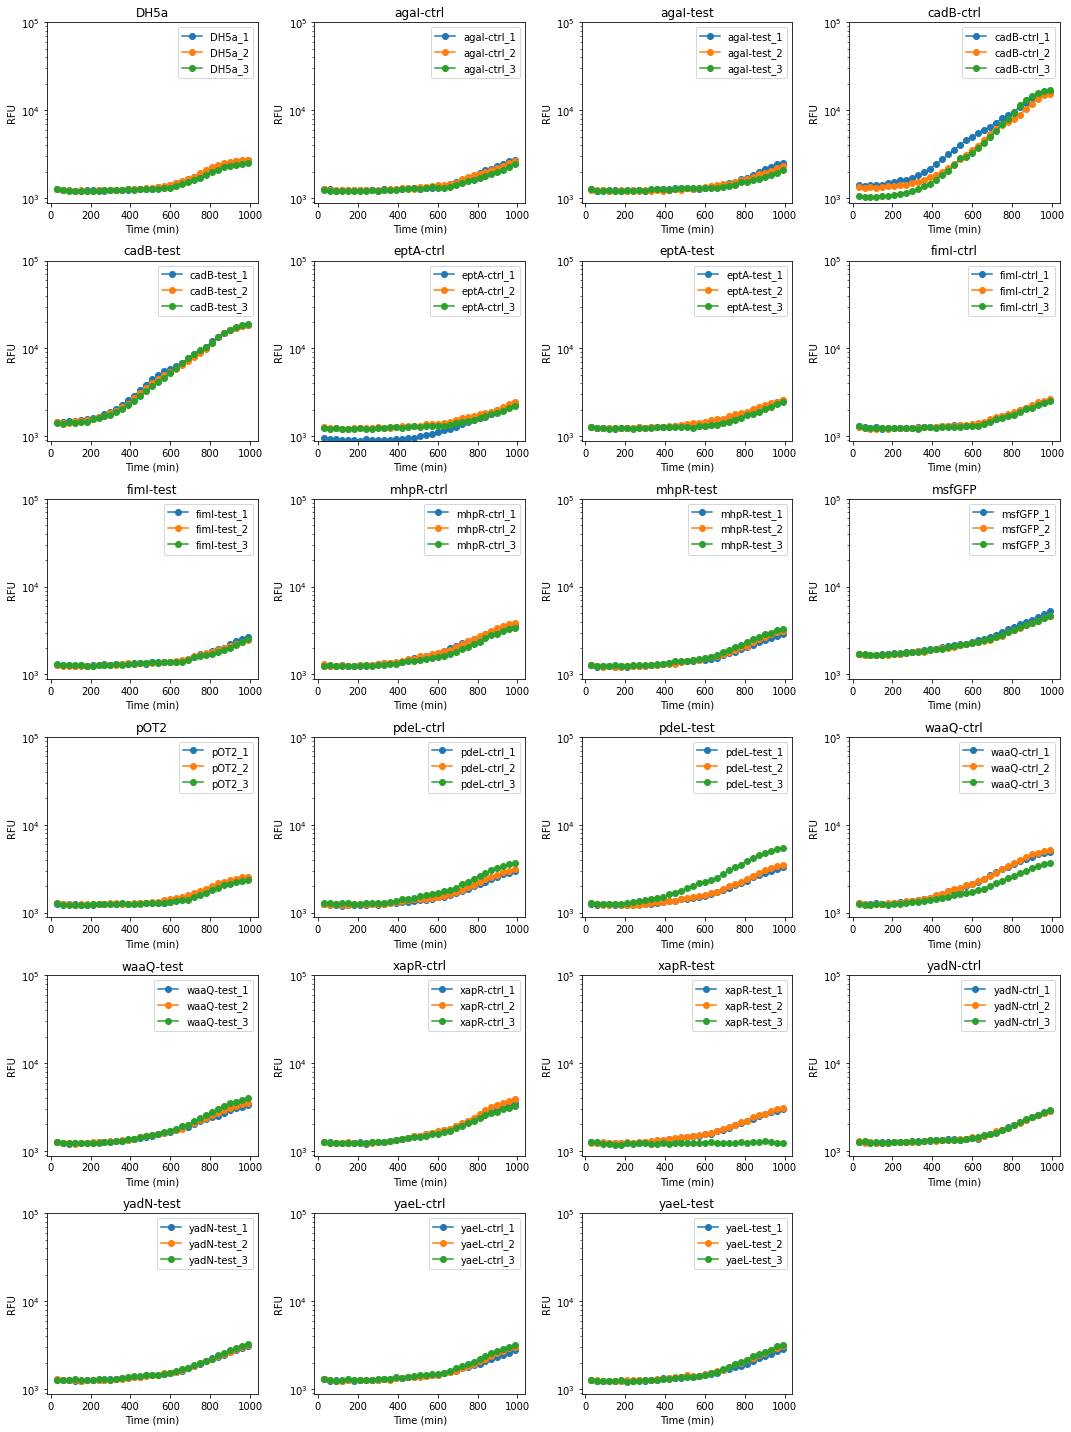

In [5]:
# Extracting unique sample names
samples = set([s.split('_')[0] for s in df.columns[1:]])  # Assuming first column is 'Time'

# Filter out blank samples
samples = [s for s in samples if not s.startswith('Blank')]

# Calculate the number of rows needed for subplots
n_samples = len(samples)
n_cols = 4
n_rows = (n_samples + n_cols - 1) // n_cols  # This ensures enough rows for all samples

# Determine global y-axis limits for log scale
y_min = float('inf')
y_max = float('-inf')

for sample in samples:
    for i in range(1, 4):  # Loop through replicates _1, _2, _3
        replicate = f'{sample}_{i}'
        if replicate in df.columns:
            y_min = min(y_min, df[replicate].min())
            y_max = max(y_max, df[replicate].max())

# Adjust y-axis limits for log scale
y_min = max(y_min, 1e-2)  # Ensure a minimum limit for log scale (adjust as needed)
y_max = 10**np.ceil(np.log10(y_max))  # Round up to the nearest power of 10

# Creating subplots for each sample and its replicates
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 20))
axs = axs.flatten()  # Flatten the 2D array of axes into a 1D array

# Plotting each sample and its replicates in separate subplots
for idx, sample in enumerate(sorted(samples)):  # Sort to ensure similar names are side by side
    ax = axs[idx]  # Select the current subplot
    
    for i in range(1, 4):  # Loop through replicates _1, _2, _3
        replicate = f'{sample}_{i}'
        if replicate in df.columns:
            ax.plot(df['Time'], df[replicate], marker='o', linestyle='-', label=replicate)
    
    ax.set_xlabel('Time (min)')
    ax.set_ylabel('RFU')
    ax.set_title(f'{sample}')
    ax.legend()
    ax.set_ylim(y_min, y_max)  # Set the y-axis limits for log scale
    ax.set_yscale('log')  # Set y-axis to log scale

# Hide unused subplots if any
for j in range(n_samples, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout and save the plot
plt.tight_layout()
#plt.savefig('/Users/bamudamaris/ownCloud2/labs/figures/gfp_analysis/clones1_R1.svg', dpi=300)
plt.show()


Variability between replicates. 

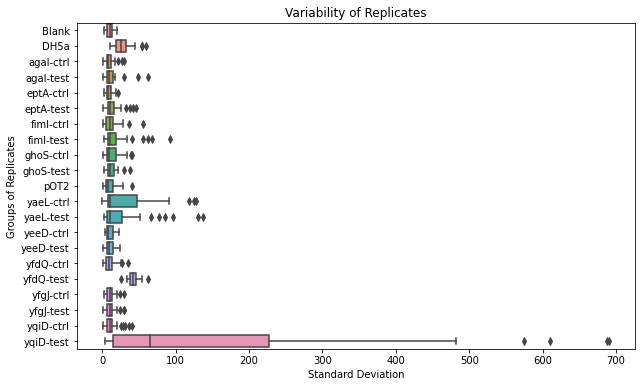

In [4]:
data = df.copy()
data = data.set_index('Time')

samples = set(c.split('_')[0] for c in data.columns)
means = data.groupby(data.columns.str.split('_').str[0], axis = 1).mean()
stds = data.groupby(data.columns.str.split('_').str[0], axis = 1).std()

plt.figure(figsize=(10, 6))
sns.boxplot(data=stds, orient='h')
plt.xlabel('Standard Deviation')
plt.ylabel('Groups of Replicates')
plt.title('Variability of Replicates')
plt.show()

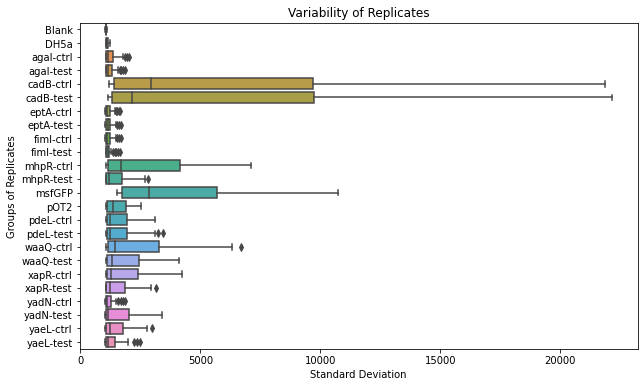

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=means, orient='h')
plt.xlabel('Standard Deviation')
plt.ylabel('Groups of Replicates')
plt.title('Variability of Replicates')
plt.show()

Compare gfp expression between WT and MT promoter

In [5]:
def plot_gfp(od_df, fluorescence_df):
    
    # Average out od of replicates
    od_df.columns = [col.split('_')[0] for col in od_df.columns]
    od_averaged = od_df.groupby(od_df.columns, axis=1).mean()

    # Average out fluorescence of replicates
    fluorescence_df.columns = [col.split('_')[0] for col in fluorescence_df.columns]
    fluorescence_averaged = fluorescence_df.groupby(fluorescence_df.columns, axis=1).mean()

    # Normalize OD600 by the blank 
    normalized_od_blank = od_averaged.sub(od_averaged['Blank'], axis=0)

    # Normalize fluorescence by the blank and OD600
    normalized_flo_blank = fluorescence_averaged.sub(fluorescence_averaged['Blank'], axis=0)
    fluorescence_od = normalized_flo_blank / normalized_od_blank

    # Make plot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 9))

    # Define color palette
    colors = {'Blank': 'black'}

    # Define colors for different conditions (ctrl, test, pOT2, etc.)
    for col in normalized_od_blank.columns:
        if 'ctrl' in col:
            colors[col] = 'forestgreen'
        elif 'test' in col:
            colors[col] = 'firebrick'
        elif 'pOT2' in col:
            colors[col] = 'darkorange'
        elif 'DH5a' in col:
            colors[col] = 'grey'
        elif 'msfGFP' in col:
            colors[col] = 'dodgerblue'

    # Plot OD600 data 
    for column in normalized_od_blank.columns:
        sns.lineplot(data=normalized_od_blank, x=normalized_od_blank.index, y=column, label=column, ax=ax1, linewidth=2.5, color=colors.get(column, 'black'))
    ax1.set_xlabel('Time (mins)')
    ax1.set_ylabel('OD600')
    ax1.legend(loc='upper right', bbox_to_anchor=(1.25, 1)) 

    # Plot fluorescence data 
    fluorescence_od = fluorescence_od.fillna(0)
    for column in fluorescence_od.columns:
        sns.lineplot(data=fluorescence_od, x=fluorescence_od.index, y=column, label=column, ax=ax2, linewidth=2.5, color=colors.get(column, 'black'))
    ax2.set_xlabel('Time (mins)')
    ax2.set_ylabel('RFU \n (OD normalised)')
    ax2.legend(loc='upper right', bbox_to_anchor=(1.25, 1)) 
    ax2.set_yscale('log')  # Set y-axis to logarithmic scale
    plt.tight_layout()
    plt.rcParams.update({'font.size': 16})

In [6]:
gfp = pd.read_excel('/Users/bamudamaris/ownCloud2/labs/datasets/gfp_measurement/clones_batch3_R3_22.06.24.xlsx', sheet_name = 'gfp', index_col = 0)
gfp = gfp[gfp.index >= 200]
od = pd.read_excel('/Users/bamudamaris/ownCloud2/labs/datasets/gfp_measurement/clones_batch3_R3_22.06.24.xlsx', sheet_name = 'OD600', index_col = 0)
od = od[od.index >= 200]

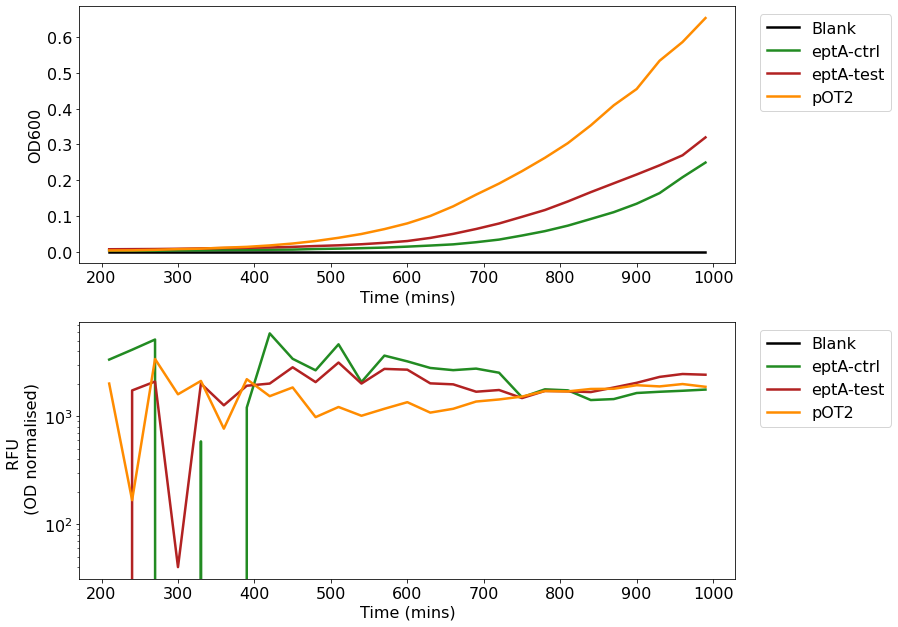

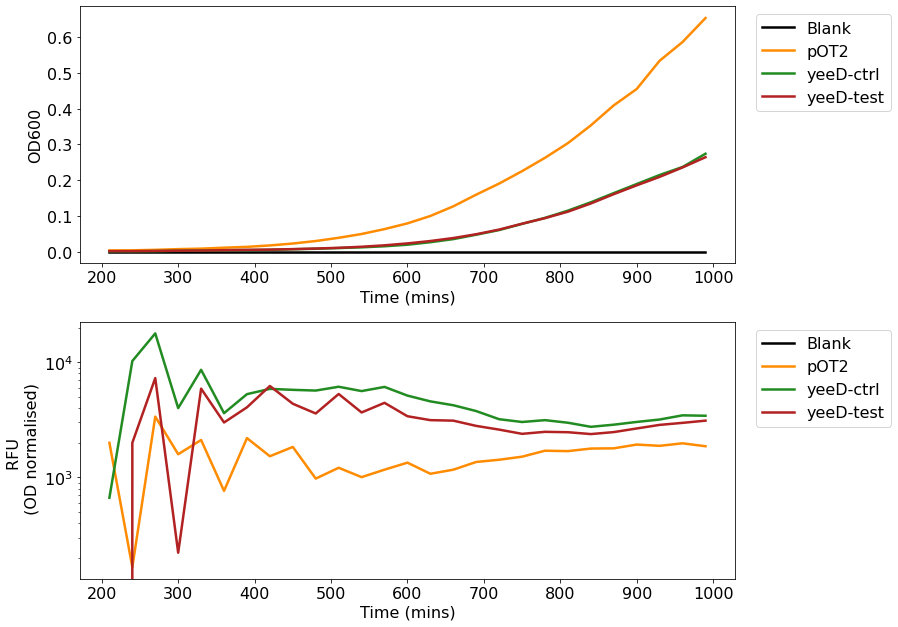

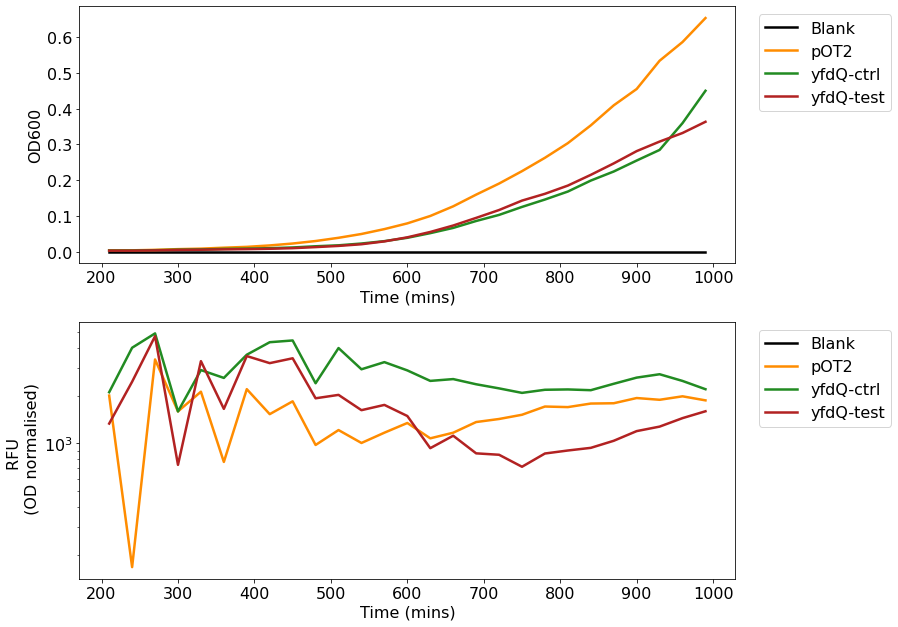

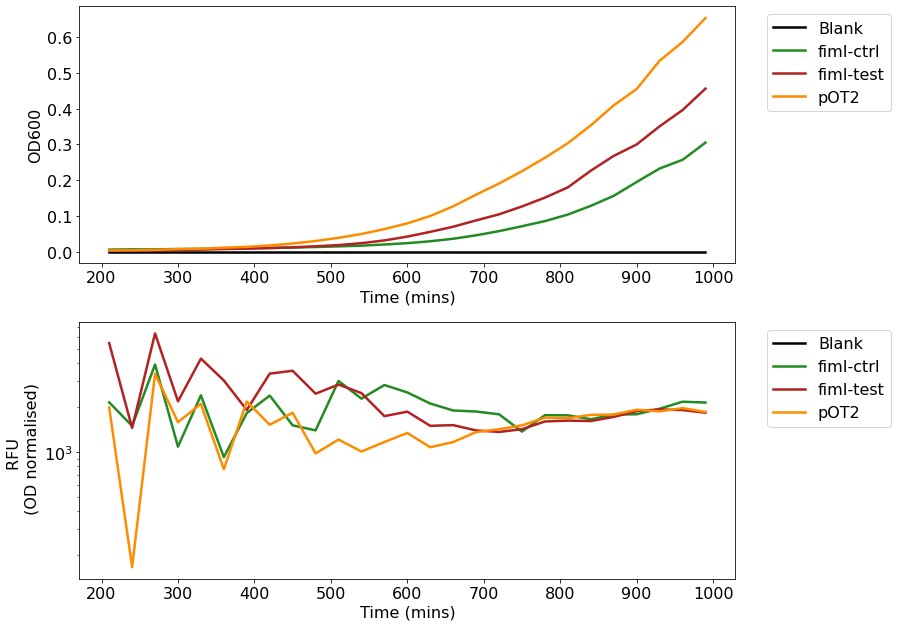

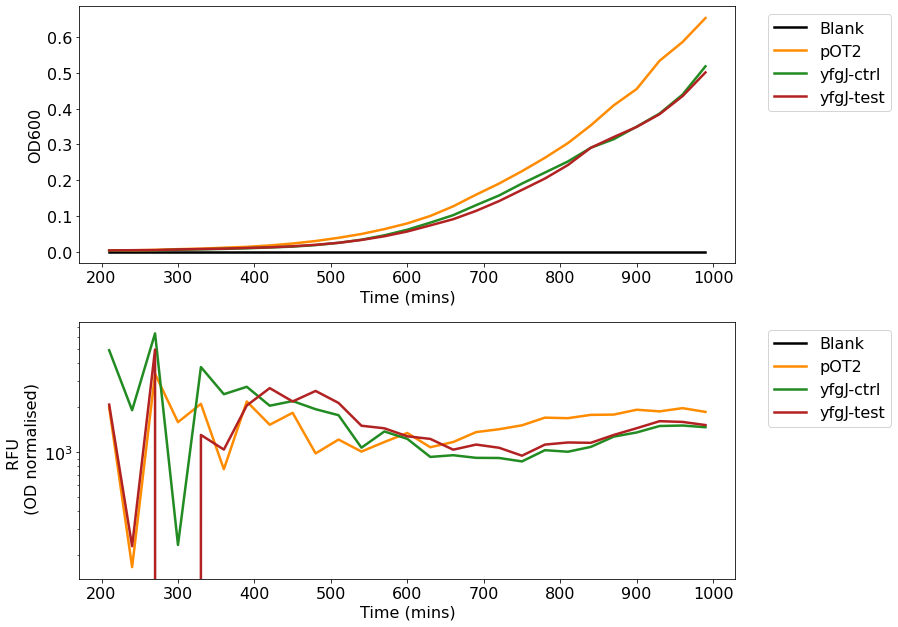

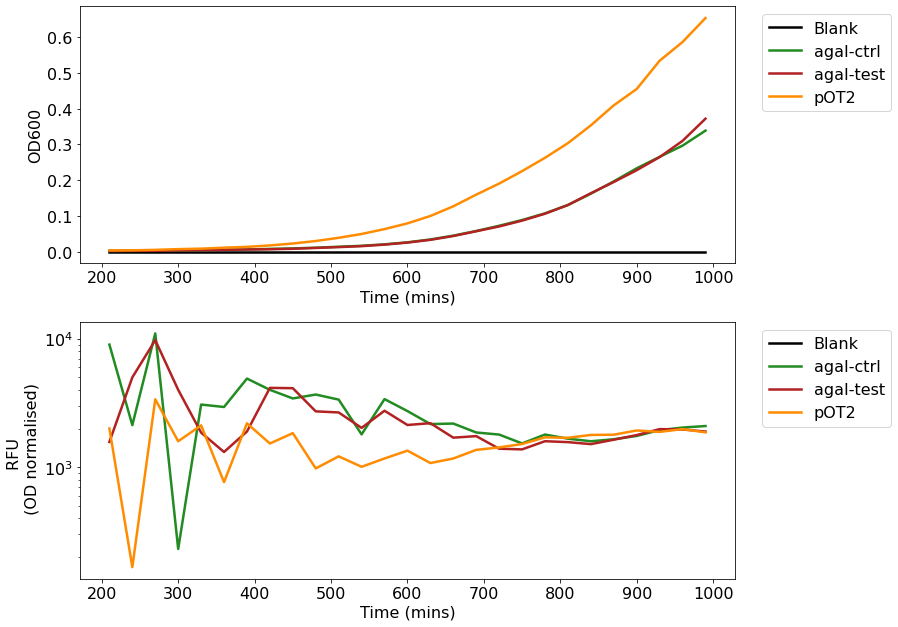

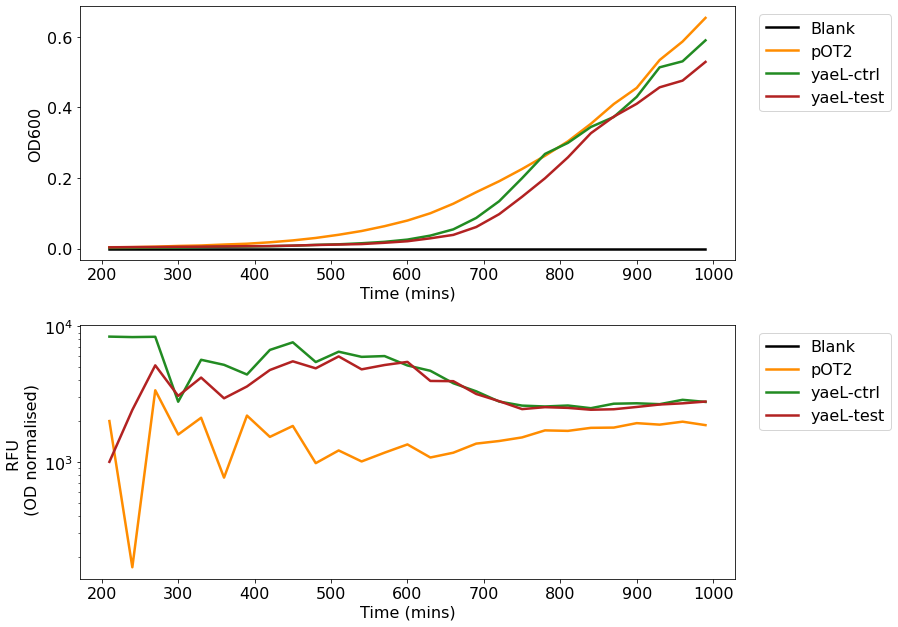

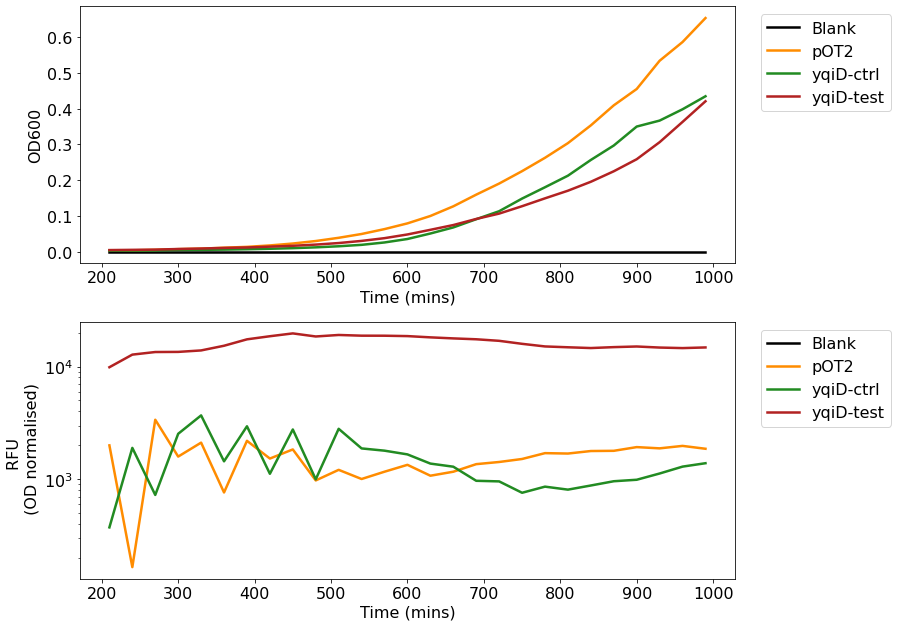

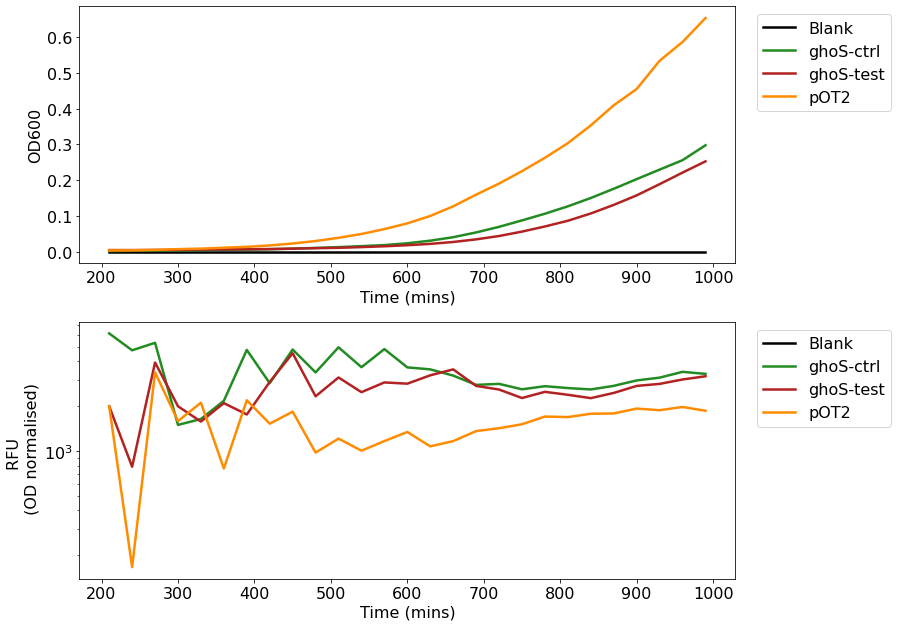

In [9]:
genes = {col.split('-')[0] for col in gfp.columns if col.split('_')[0] != 'pOT2' and col.split('_')[0] != 'Blank' and col.split('_')[0] != 'msfGFP' and col.split('_')[0] != 'DH5a'}

for gene in genes:
    cols = [col for col in od.columns if col.startswith(('Blank', 'pOT2', gene))]
    od_df = od[cols]
    fluorescence_df = gfp[cols]
    
    plot_gfp(od_df, fluorescence_df)
    #plt.savefig(f'/Users/bamudamaris/ownCloud2/labs/figures/gfp_analysis/C3_R3/{gene}.svg', dpi = 300)

In [ ]:
#average out od of replicates

od.columns = [col.split('_')[0] for col in od.columns]
o = od.groupby(od.columns, axis=1)
od_averaged = o.mean()

#average out fluorescence of replicates
gfp.columns = [col.split('_')[0] for col in gfp.columns]
f = gfp.groupby(gfp.columns, axis=1)
gfp_averaged = f.mean()

# Normalize OD600 by the blank 
normalized_od_blank = od_averaged.sub(od_averaged['Blank'], axis=0)

# Normalize fluorescence by the blank and OD600
normalized_flo_blank = gfp_averaged.sub(gfp_averaged['Blank'], axis=0)
fluorescence_od = normalized_flo_blank / normalized_od_blank


targets = fluorescence_od.drop(['Blank', 'pOT2'], axis=1)
grouped_columns = {}
group_pairs = []
for column in targets.columns:
    prefix = column.split('-')[0]
    if prefix not in grouped_columns:
        grouped_columns[prefix] = []
    grouped_columns[prefix].append(column)

for prefix, columns in grouped_columns.items():
    if len(columns) == 2:
        group_pairs.append((columns[0], columns[1]))


# Compute fold enrichment for each test sample compared to its control
enrichment_results = {}
for group1, group2 in group_pairs:
    group1_values = fluorescence_od[group1].dropna()
    group2_values = fluorescence_od[group2].dropna()
    
    # Compute fold enrichment (mean of test values / mean of control values)
    fold_enrichment = group2_values.mean() / group1_values.mean()
    
    # Perform paired samples t-test
    t_stat, p_value = stats.ttest_rel(group1_values, group2_values)
    
    # Check if the enrichment is significant (p-value < 0.05)
    significant_enrichment = p_value < 0.05
    
    # Store fold enrichment and significance information
    enrichment_results[group2] = {'fold_enrichment': fold_enrichment, 'significant_enrichment': significant_enrichment}


# Extract gene names, fold enrichment values, and significance information
genes = list(enrichment_results.keys())
fold_enrichments = [result['fold_enrichment'] for result in enrichment_results.values()]
significant_enrichments = [result['significant_enrichment'] for result in enrichment_results.values()]

# Take log2 transformation of fold enrichment values
fold_enrichments_log2 = np.log2(fold_enrichments)

# Define colors based on fold enrichment values
bar_colors = ['slateblue' if fold_enrichment > 0 else 'lightcoral' for fold_enrichment in fold_enrichments_log2]

# Create horizontal bar plot
plt.figure(figsize=(10, 4))
plt.rcParams.update({'font.size': 16})
bar_labels = [gene.split('-')[0] for gene, fold_enrichment in zip(genes, fold_enrichments_log2)]
bar_positions = np.arange(len(genes))

plt.barh(bar_positions, fold_enrichments_log2, color=bar_colors)
plt.yticks(bar_positions, bar_labels)
plt.xlabel('Log2(fold enrichment)')

ValueError: unequal length arrays